## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.104127  1.329076 -1.418494 -0.720521 -1.461166  0.365985
1  0.001426 -1.133990 -1.210805  0.757399  0.031341  0.110826
2 -1.317753 -1.216840 -1.423645 -1.394630 -0.835984 -1.616669
3 -0.789436 -1.655100  0.826210 -1.136309  1.673345 -1.285406
4  0.315065 -0.861647 -1.320474 -1.778323  0.288964 -0.791296


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9517389	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9419524	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9325638	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9225969	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9141077	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9045813	total: 59.6ms	remaining: 9.88s
6:	learn: 0.8936240	total: 60.1ms	remaining: 8.52s
7:	learn: 0.8856232	total: 60.5ms	remaining: 7.5s
8:	learn: 0.8778585	total: 60.9ms	remaining: 6.71s
9:	learn: 0.8688831	total: 61.4ms	remaining: 6.07s
10:	learn: 0.8599159	total: 62ms	remaining: 5.57s
11:	learn: 0.8502611	total: 62.4ms	remaining: 5.14s
12:	learn: 0.8420531	total: 62.8ms	remaining: 4.77s
13:	learn: 0.8344519	total: 63.2ms	remaining: 4.45s
14:	learn: 0.8267968	total: 63.6ms	remaining: 4.17s
15:	learn: 0.8190328	total: 64ms	remaining: 3.93s
16:	learn: 0.8131616	total: 64.4ms	remaining: 3.73s
17:	learn: 0.8048060	total: 64.8ms	remaining: 3.53s
18:	learn: 0.7977961	total: 65.3ms	remaining: 3.3

110:	learn: 0.3690990	total: 109ms	remaining: 870ms
111:	learn: 0.3664256	total: 109ms	remaining: 866ms
112:	learn: 0.3632676	total: 110ms	remaining: 861ms
113:	learn: 0.3608987	total: 110ms	remaining: 856ms
114:	learn: 0.3577345	total: 111ms	remaining: 852ms
115:	learn: 0.3549147	total: 111ms	remaining: 846ms
116:	learn: 0.3519748	total: 112ms	remaining: 842ms
117:	learn: 0.3498342	total: 112ms	remaining: 836ms
118:	learn: 0.3473997	total: 112ms	remaining: 833ms
119:	learn: 0.3447066	total: 113ms	remaining: 828ms
120:	learn: 0.3422590	total: 113ms	remaining: 823ms
121:	learn: 0.3396583	total: 114ms	remaining: 819ms
122:	learn: 0.3377942	total: 114ms	remaining: 814ms
123:	learn: 0.3355731	total: 115ms	remaining: 812ms
124:	learn: 0.3328308	total: 115ms	remaining: 808ms
125:	learn: 0.3302872	total: 116ms	remaining: 803ms
126:	learn: 0.3273081	total: 116ms	remaining: 799ms
127:	learn: 0.3254609	total: 117ms	remaining: 794ms
128:	learn: 0.3231216	total: 117ms	remaining: 791ms
129:	learn: 

220:	learn: 0.1716627	total: 180ms	remaining: 635ms
221:	learn: 0.1702312	total: 181ms	remaining: 634ms
222:	learn: 0.1688373	total: 181ms	remaining: 632ms
223:	learn: 0.1675724	total: 182ms	remaining: 630ms
224:	learn: 0.1662526	total: 182ms	remaining: 629ms
225:	learn: 0.1650237	total: 183ms	remaining: 627ms
226:	learn: 0.1644780	total: 183ms	remaining: 625ms
227:	learn: 0.1633616	total: 184ms	remaining: 623ms
228:	learn: 0.1619508	total: 184ms	remaining: 621ms
229:	learn: 0.1608027	total: 185ms	remaining: 619ms
230:	learn: 0.1595554	total: 185ms	remaining: 617ms
231:	learn: 0.1584824	total: 186ms	remaining: 615ms
232:	learn: 0.1571546	total: 186ms	remaining: 613ms
233:	learn: 0.1558291	total: 187ms	remaining: 611ms
234:	learn: 0.1553524	total: 187ms	remaining: 609ms
235:	learn: 0.1541354	total: 188ms	remaining: 608ms
236:	learn: 0.1536862	total: 188ms	remaining: 606ms
237:	learn: 0.1527157	total: 189ms	remaining: 604ms
238:	learn: 0.1516590	total: 189ms	remaining: 603ms
239:	learn: 

431:	learn: 0.0479432	total: 285ms	remaining: 375ms
432:	learn: 0.0476772	total: 285ms	remaining: 374ms
433:	learn: 0.0473657	total: 286ms	remaining: 373ms
434:	learn: 0.0471052	total: 286ms	remaining: 372ms
435:	learn: 0.0469607	total: 287ms	remaining: 371ms
436:	learn: 0.0468437	total: 287ms	remaining: 370ms
437:	learn: 0.0465722	total: 288ms	remaining: 369ms
438:	learn: 0.0464356	total: 288ms	remaining: 368ms
439:	learn: 0.0461897	total: 289ms	remaining: 367ms
440:	learn: 0.0459380	total: 289ms	remaining: 367ms
441:	learn: 0.0456421	total: 290ms	remaining: 366ms
442:	learn: 0.0454077	total: 290ms	remaining: 365ms
443:	learn: 0.0451185	total: 291ms	remaining: 364ms
444:	learn: 0.0448748	total: 291ms	remaining: 363ms
445:	learn: 0.0447403	total: 292ms	remaining: 362ms
446:	learn: 0.0444996	total: 292ms	remaining: 361ms
447:	learn: 0.0443680	total: 292ms	remaining: 360ms
448:	learn: 0.0441385	total: 293ms	remaining: 360ms
449:	learn: 0.0438607	total: 293ms	remaining: 359ms
450:	learn: 

593:	learn: 0.0218298	total: 363ms	remaining: 248ms
594:	learn: 0.0217253	total: 363ms	remaining: 247ms
595:	learn: 0.0216612	total: 364ms	remaining: 247ms
596:	learn: 0.0215587	total: 364ms	remaining: 246ms
597:	learn: 0.0214662	total: 365ms	remaining: 245ms
598:	learn: 0.0213690	total: 365ms	remaining: 245ms
599:	learn: 0.0212328	total: 366ms	remaining: 244ms
600:	learn: 0.0210989	total: 366ms	remaining: 243ms
601:	learn: 0.0209672	total: 366ms	remaining: 242ms
602:	learn: 0.0208376	total: 367ms	remaining: 242ms
603:	learn: 0.0207102	total: 368ms	remaining: 241ms
604:	learn: 0.0206513	total: 368ms	remaining: 240ms
605:	learn: 0.0205438	total: 369ms	remaining: 240ms
606:	learn: 0.0204861	total: 369ms	remaining: 239ms
607:	learn: 0.0203811	total: 370ms	remaining: 238ms
608:	learn: 0.0202704	total: 370ms	remaining: 238ms
609:	learn: 0.0201682	total: 371ms	remaining: 237ms
610:	learn: 0.0201123	total: 371ms	remaining: 236ms
611:	learn: 0.0199908	total: 371ms	remaining: 236ms
612:	learn: 

811:	learn: 0.0096306	total: 468ms	remaining: 108ms
812:	learn: 0.0095997	total: 468ms	remaining: 108ms
813:	learn: 0.0095694	total: 469ms	remaining: 107ms
814:	learn: 0.0095494	total: 469ms	remaining: 106ms
815:	learn: 0.0095197	total: 469ms	remaining: 106ms
816:	learn: 0.0095000	total: 470ms	remaining: 105ms
817:	learn: 0.0094671	total: 471ms	remaining: 105ms
818:	learn: 0.0094467	total: 471ms	remaining: 104ms
819:	learn: 0.0094144	total: 471ms	remaining: 103ms
820:	learn: 0.0093805	total: 472ms	remaining: 103ms
821:	learn: 0.0093561	total: 472ms	remaining: 102ms
822:	learn: 0.0093253	total: 473ms	remaining: 102ms
823:	learn: 0.0092940	total: 473ms	remaining: 101ms
824:	learn: 0.0092625	total: 474ms	remaining: 100ms
825:	learn: 0.0092389	total: 474ms	remaining: 99.9ms
826:	learn: 0.0092083	total: 474ms	remaining: 99.3ms
827:	learn: 0.0091754	total: 475ms	remaining: 98.6ms
828:	learn: 0.0091460	total: 475ms	remaining: 98ms
829:	learn: 0.0091159	total: 476ms	remaining: 97.5ms
830:	lear

976:	learn: 0.0055937	total: 546ms	remaining: 12.8ms
977:	learn: 0.0055640	total: 546ms	remaining: 12.3ms
978:	learn: 0.0055549	total: 547ms	remaining: 11.7ms
979:	learn: 0.0055347	total: 548ms	remaining: 11.2ms
980:	learn: 0.0055167	total: 548ms	remaining: 10.6ms
981:	learn: 0.0055083	total: 549ms	remaining: 10.1ms
982:	learn: 0.0054906	total: 550ms	remaining: 9.51ms
983:	learn: 0.0054728	total: 550ms	remaining: 8.95ms
984:	learn: 0.0054629	total: 551ms	remaining: 8.39ms
985:	learn: 0.0054433	total: 551ms	remaining: 7.83ms
986:	learn: 0.0054336	total: 552ms	remaining: 7.27ms
987:	learn: 0.0054172	total: 552ms	remaining: 6.71ms
988:	learn: 0.0054078	total: 553ms	remaining: 6.15ms
989:	learn: 0.0053906	total: 553ms	remaining: 5.59ms
990:	learn: 0.0053812	total: 554ms	remaining: 5.03ms
991:	learn: 0.0053643	total: 555ms	remaining: 4.47ms
992:	learn: 0.0053531	total: 555ms	remaining: 3.91ms
993:	learn: 0.0053302	total: 555ms	remaining: 3.35ms
994:	learn: 0.0053242	total: 556ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

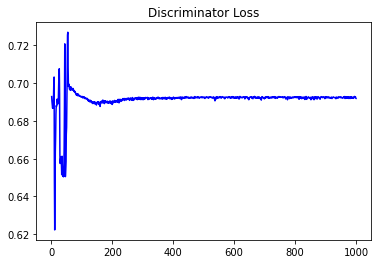

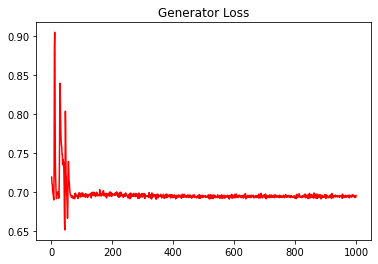

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08073253204631721


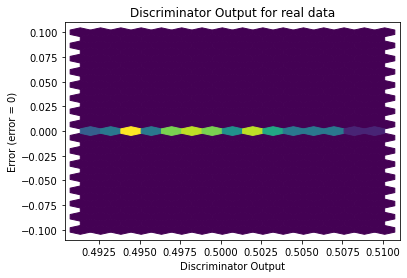

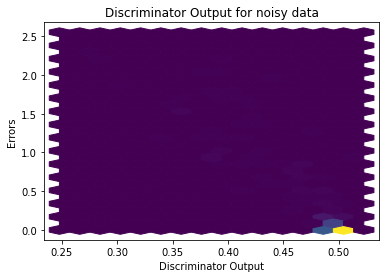

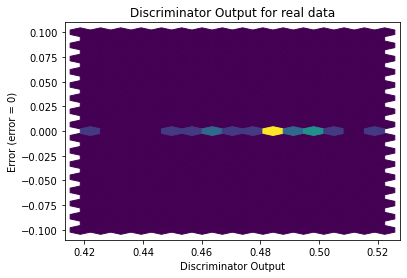

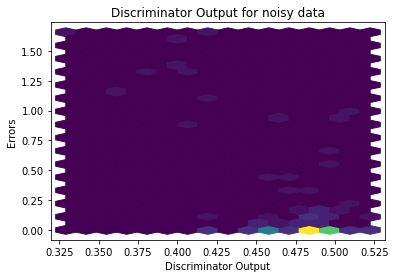

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


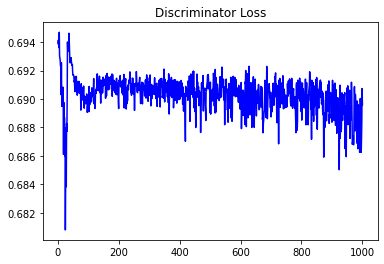

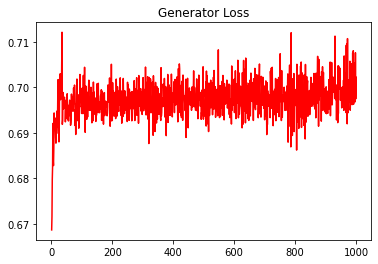

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07389724766437111


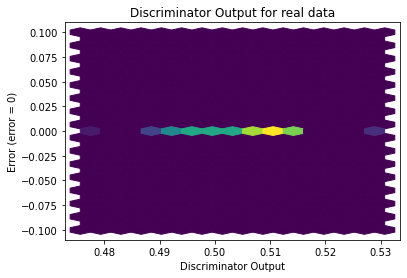

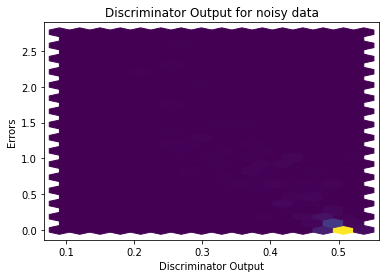

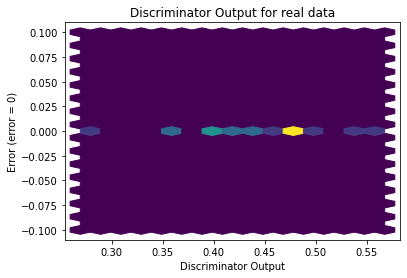

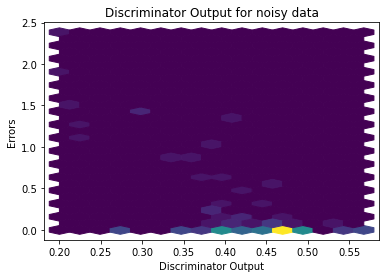

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4433]], requires_grad=True)
